# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key



'e52551c4f72edabae5d605fceb3d1730'

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather['coord']['lat']
        city_lng = weather['coord']['lon']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_clouds = weather['clouds']['all']
        city_wind = weather ['wind']['speed']
        city_country = weather['sys']['country']
        city_date = weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | haverfordwest
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | warmbad
Processing Record 7 of Set 1 | zhigansk
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | kungurtug
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | inhambane
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | kassala
Processi

Processing Record 41 of Set 4 | sundumbili
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | ewa beach
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | ndioum
Processing Record 47 of Set 4 | sajanan
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | wichian buri
Processing Record 0 of Set 5 | korla
Processing Record 1 of Set 5 | balimo
City not found. Skipping...
Processing Record 2 of Set 5 | blagoveshchenka
Processing Record 3 of Set 5 | higuey
City not found. Skipping...
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | asau
Processing Record 7 of Set 5 | kamenka
Processing Record 8 of Set 5 | ziarat
Processing Record 9 of Set 5 | port hardy
Processing Record 10 of Set 5 | mogadishu
Processing Record 11 of Set 5 | souillac
Processing Record 12 of Set 5 | iqaluit
Processing Record 13 of Set 5 | amapa
Processing 

Processing Record 28 of Set 8 | chum phae
Processing Record 29 of Set 8 | emerald
Processing Record 30 of Set 8 | paso de los toros
Processing Record 31 of Set 8 | sataua
City not found. Skipping...
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | carauari
Processing Record 34 of Set 8 | barawe
City not found. Skipping...
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | tapaua
City not found. Skipping...
Processing Record 37 of Set 8 | sobolevo
Processing Record 38 of Set 8 | kapit
Processing Record 39 of Set 8 | tiksi
Processing Record 40 of Set 8 | sioux lookout
Processing Record 41 of Set 8 | sukhumi
Processing Record 42 of Set 8 | puerto leguizamo
Processing Record 43 of Set 8 | anchorage
Processing Record 44 of Set 8 | gotsu
Processing Record 45 of Set 8 | asfi
Processing Record 46 of Set 8 | adrar
Processing Record 47 of Set 8 | valparaiso
Processing Record 48 of Set 8 | linfen
Processing Record 49 of Set 8 | hameenlinna
Pro

Processing Record 15 of Set 12 | sabancuy
Processing Record 16 of Set 12 | half moon bay
Processing Record 17 of Set 12 | ilave
Processing Record 18 of Set 12 | batagay
Processing Record 19 of Set 12 | poum
Processing Record 20 of Set 12 | slavonice
Processing Record 21 of Set 12 | bijie
Processing Record 22 of Set 12 | pacaembu
Processing Record 23 of Set 12 | murray
Processing Record 24 of Set 12 | paysandu
Processing Record 25 of Set 12 | maralal
Processing Record 26 of Set 12 | leh
Processing Record 27 of Set 12 | vangaindrano
Processing Record 28 of Set 12 | deputatskiy
Processing Record 29 of Set 12 | tonj
Processing Record 30 of Set 12 | parabel
Processing Record 31 of Set 12 | belmonte
Processing Record 32 of Set 12 | tabas
Processing Record 33 of Set 12 | saint-augustin
Processing Record 34 of Set 12 | narasannapeta
Processing Record 35 of Set 12 | coahuayana
Processing Record 36 of Set 12 | skerries
Processing Record 37 of Set 12 | soligalich
Processing Record 38 of Set 12 | 

In [34]:
# Convert the cities weather data into a Pandas DataFrame
                    
city_data_df= pd.DataFrame(city_data)  
city_data_df

# Show Record Count

city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,56.91,68,98,5.99,AU,1669480309
1,san patricio,28.0170,-97.5169,62.47,54,42,16.71,US,1669480309
2,haverfordwest,51.8017,-4.9691,54.05,95,100,8.99,GB,1669480309
3,punta arenas,-53.1500,-70.9167,53.62,54,75,24.16,CL,1669480310
4,busselton,-33.6500,115.3333,51.69,83,2,11.05,AU,1669480310


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,56.91,68,98,5.99,AU,1669480309
1,san patricio,28.0170,-97.5169,62.47,54,42,16.71,US,1669480309
2,haverfordwest,51.8017,-4.9691,54.05,95,100,8.99,GB,1669480309
3,punta arenas,-53.1500,-70.9167,53.62,54,75,24.16,CL,1669480310
4,busselton,-33.6500,115.3333,51.69,83,2,11.05,AU,1669480310


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

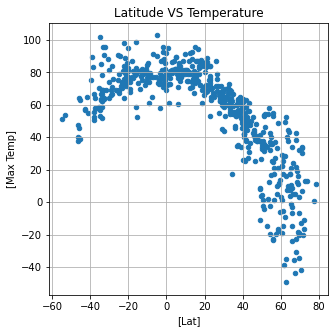

In [38]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x=['Lat'], y=['Max Temp'], grid=True, figsize = (5,5), title= "Latitude VS Temperature")


# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

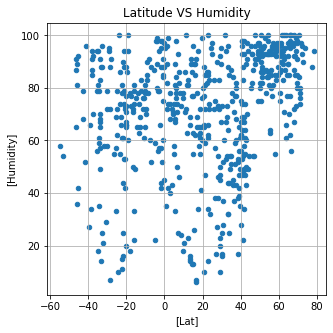

In [39]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x=['Lat'], y=['Humidity'], grid=True, figsize = (5,5), title= "Latitude VS Humidity")
# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

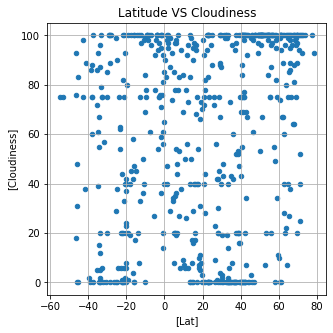

In [40]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x=['Lat'], y=['Cloudiness'], grid=True, figsize = (5,5), title= "Latitude VS Cloudiness")

# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

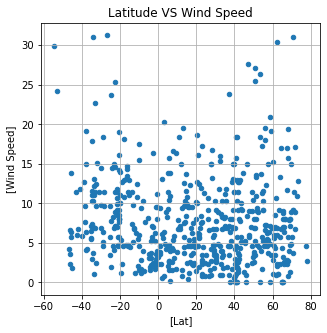

In [41]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x=['Lat'], y=['Wind Speed'], grid=True, figsize = (5,5), title= "Latitude VS Wind Speed")

# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


r-value is: -0.7019599940258664


<function matplotlib.pyplot.show(close=None, block=None)>

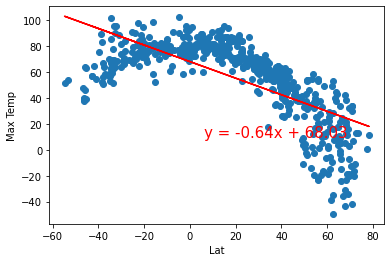

In [73]:
# Define a function to create Linear Regression plots
    
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"r-value is: {rvalue}")
plt.show
    

    
    

r-value is: 0.2520613912610947


<function matplotlib.pyplot.show(close=None, block=None)>

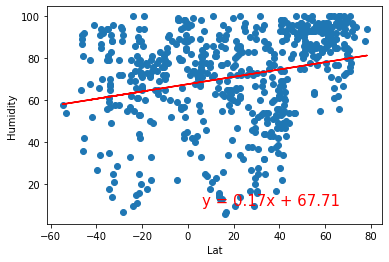

In [74]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.22048240274619266


<function matplotlib.pyplot.show(close=None, block=None)>

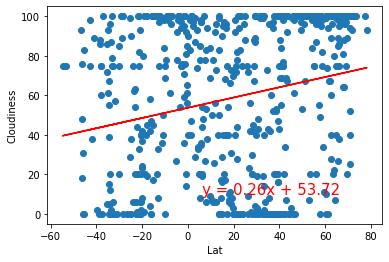

In [75]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"r-value is: {rvalue}")
plt.show

r-value is: -0.09778178086704307


<function matplotlib.pyplot.show(close=None, block=None)>

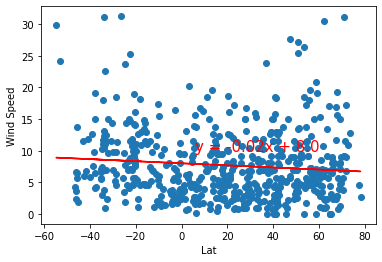

In [76]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"r-value is: {rvalue}")
plt.show

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df= city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san patricio,28.0170,-97.5169,62.47,54,42,16.71,US,1669480309
2,haverfordwest,51.8017,-4.9691,54.05,95,100,8.99,GB,1669480309
6,zhigansk,66.7697,123.3711,-35.91,97,96,8.05,RU,1669480311
7,cherskiy,68.7500,161.3000,-18.35,99,99,3.96,RU,1669480312
8,kungurtug,50.5994,97.5228,-2.25,90,100,5.21,RU,1669480312


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df= city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,56.91,68,98,5.99,AU,1669480309
3,punta arenas,-53.1500,-70.9167,53.62,54,75,24.16,CL,1669480310
4,busselton,-33.6500,115.3333,51.69,83,2,11.05,AU,1669480310
5,warmbad,-28.4500,18.7333,83.61,7,0,9.73,NaN,1669480311
9,hermanus,-34.4187,19.2345,66.79,61,15,17.94,ZA,1669480312


###  Temperature vs. Latitude Linear Regression Plot

r-value is: -0.8583996563878654


<function matplotlib.pyplot.show(close=None, block=None)>

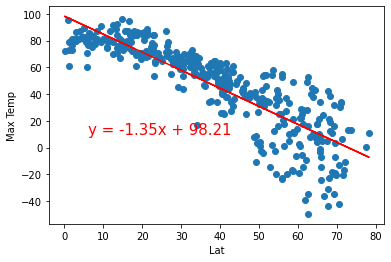

In [79]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.5360690635578383


<function matplotlib.pyplot.show(close=None, block=None)>

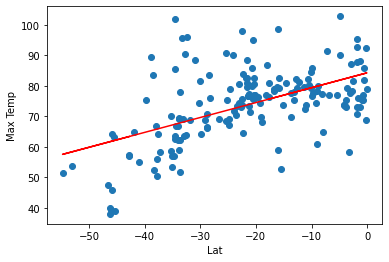

In [81]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# In regards to temperature and latitiude, we can see that the northern hemisphere had a stronger correlation between temperature and latitude compared to the sourthern hemisphere after analyzing the rvalue of both graphs. The closer the r-value is to 1 the stronger the correlation.

### Humidity vs. Latitude Linear Regression Plot

r-value is: 0.4003854689808525


<function matplotlib.pyplot.show(close=None, block=None)>

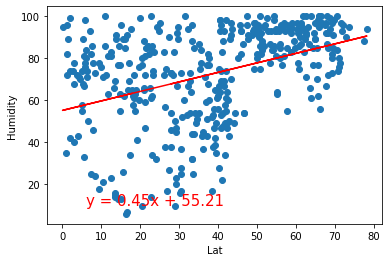

In [82]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.13027885127490882


<function matplotlib.pyplot.show(close=None, block=None)>

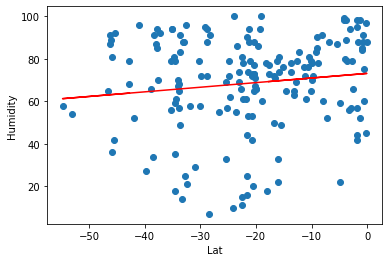

In [83]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# We can see that there is a slightly higher correlation for latitude and humidity for the northern hemisphere compared to the southern hemisphere since the r-value for northern was .4 comapred to southern which was .1.






### Cloudiness vs. Latitude Linear Regression Plot

r-value is: 0.2927854446496718


<function matplotlib.pyplot.show(close=None, block=None)>

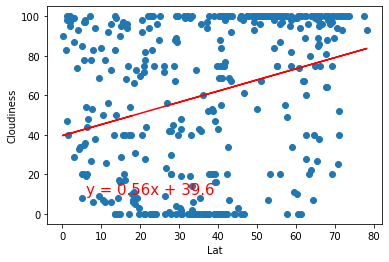

In [84]:
# Northern Hemisphere


r-value is: 0.21926651872634942


<function matplotlib.pyplot.show(close=None, block=None)>

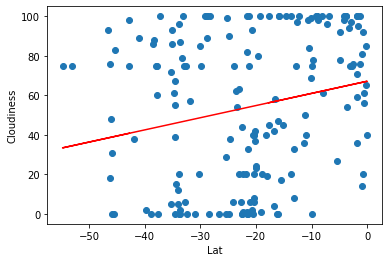

In [85]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# There is a weak correlation between latitude and cloudiness in both northern or southern hemishperes since the r-values were .2 for both. But Noerhtern hemisphere had a slightly stronger correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value is: 0.08697106997473585


<function matplotlib.pyplot.show(close=None, block=None)>

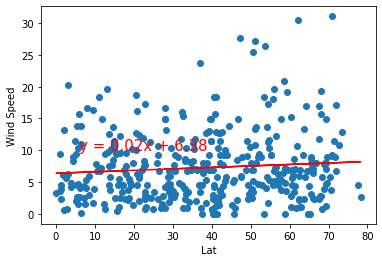

In [86]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"r-value is: {rvalue}")
plt.show

r-value is: -0.30688294030753904


<function matplotlib.pyplot.show(close=None, block=None)>

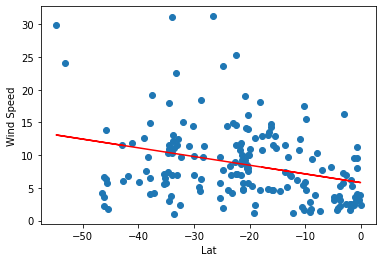

In [87]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# The southern hemisphere has a stronger correlation between wind speed and latitude since it had an r-value of .3 compared to the rvalue of .08 we saw for northern hemisphere. 